
BusinessTravel vs Attrition:
Attrition           No  Yes
BusinessTravel             
Non_Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156

DistanceFromHome vs Attrition:
Attrition          No  Yes
DistanceFromHome          
1                 182   26
2                 183   28
3                  70   14
4                  55    9
5                  55   10
6                  52    7
7                  73   11
8                  70   10
9                  67   18
10                 75   11
11                 25    4
12                 14    6
13                 13    6
14                 17    4
15                 21    5
16                 25    7
17                 15    5
18                 22    4
19                 19    3
20                 21    4
21                 15    3
22                 13    6
23                 22    5
24                 16   12
25                 19    6
26                 22    3
27                  9    3
28             

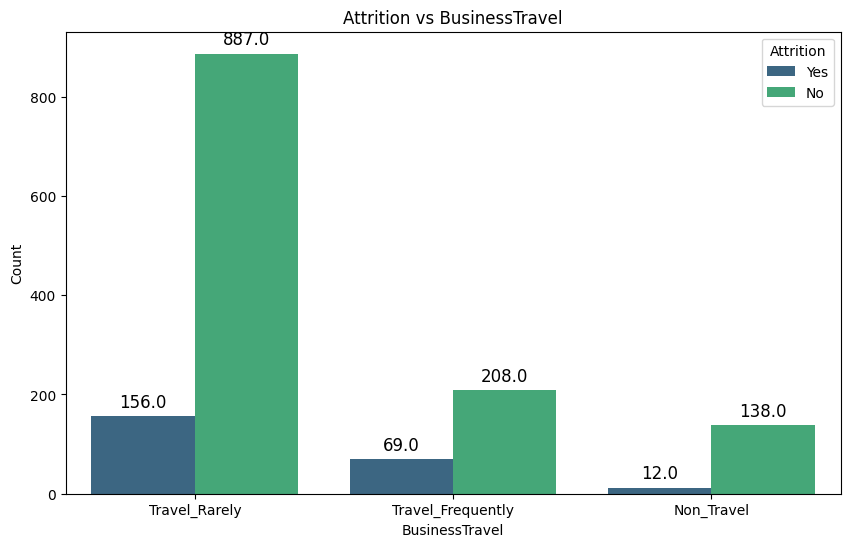

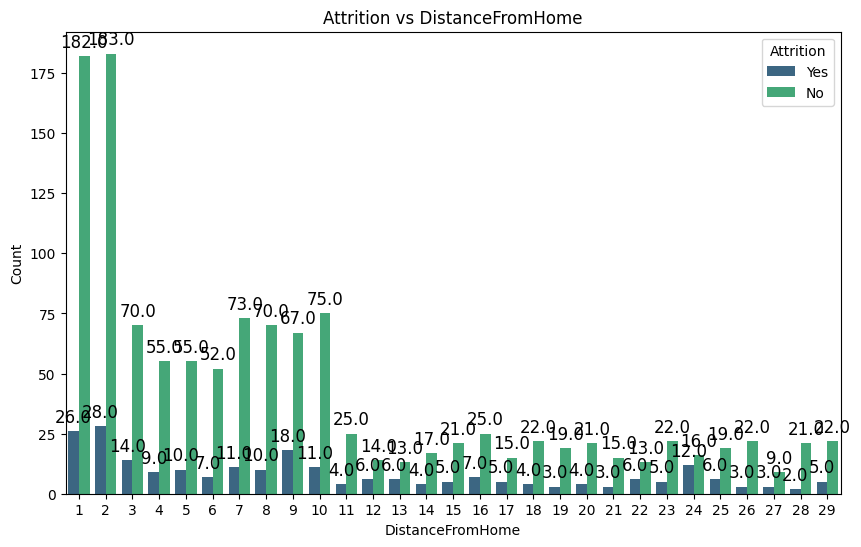

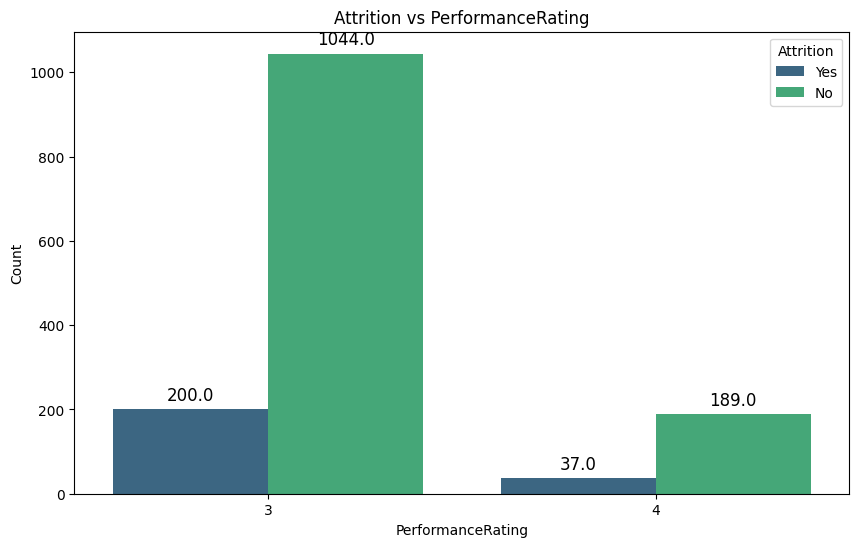

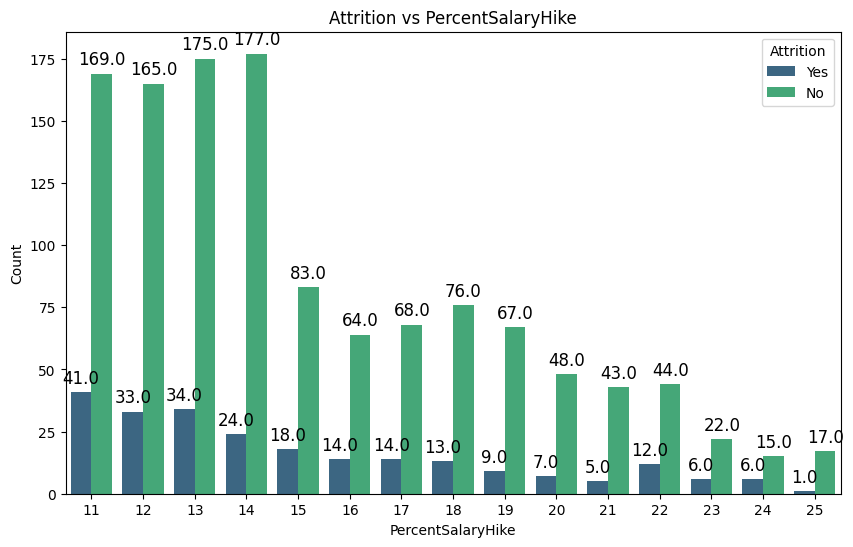

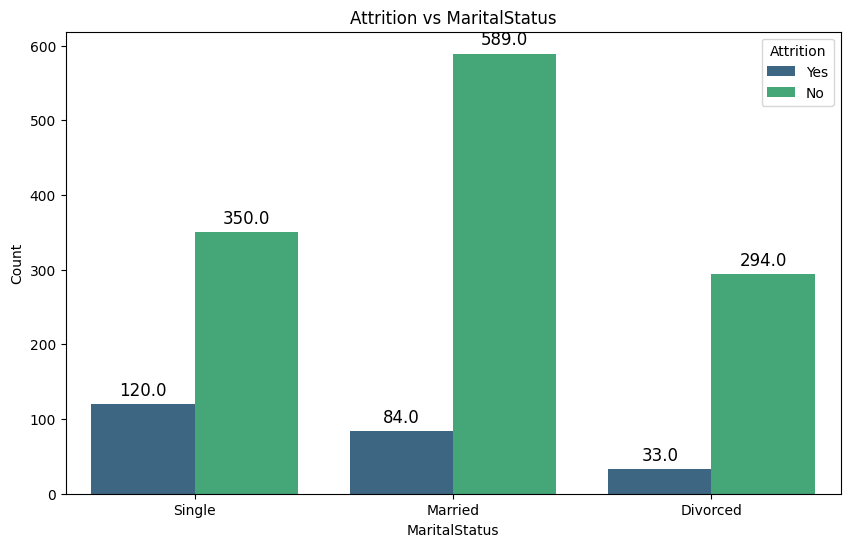

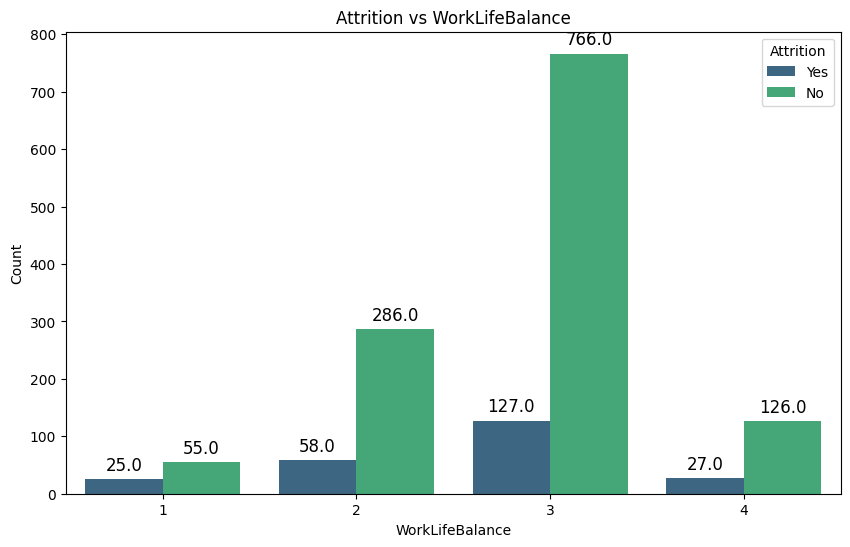

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a DataFrame
data = pd.read_csv('emp_attr.csv')

# Create a dictionary to store analysis results for each factor
analysis_results = {}

# Define a function to analyze and visualize the impact of each factor on attrition
def analyze_factor(factor):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x=factor, hue='Attrition', palette='viridis')
    plt.title(f'Attrition vs {factor}')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend(title='Attrition')
    
    # Add count values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    # Calculate and store the analysis results
    result = data.groupby([factor, 'Attrition']).size().unstack(fill_value=0)
    analysis_results[factor] = result

# 1. Business Travel
analyze_factor('BusinessTravel')

# 2. Distance from Home
analyze_factor('DistanceFromHome')

# 3. Performance Rating
analyze_factor('PerformanceRating')

# 4. Percentage Salary Hike
analyze_factor('PercentSalaryHike')

# 5. Marital Status
analyze_factor('MaritalStatus')

# 6. Work-Life Balance
analyze_factor('WorkLifeBalance')

# Print all analysis results together at the end
for factor, result in analysis_results.items():
    print(f"\n{factor} vs Attrition:")
    print(result)
